In [824]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
SRC_PATH="parsed"

# Change the value to True if you want to see the heatmap for correlations
display_correlations = False

In [825]:
def load_housing_data(src=SRC_PATH):
    csv_path = os.path.join(src, "src.csv")
    return pd.read_csv(csv_path)

In [826]:
df = load_housing_data()
df.head()

,Title,Links,Categories,Images,References,Length,Quality,Theme
0,Hammurabi,1103,45,44,97,15484,4.0,People
1,Hatshepsut,755,49,18,97,33266,3.0,People
2,Ramesses II,662,43,25,119,32507,2.0,People
3,Cyrus the Great,515,61,32,213,47616,2.0,People
4,Alexander the Great,1910,71,75,401,89053,4.0,People


In [827]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       998 non-null    object 
 1   Links       998 non-null    int64  
 2   Categories  998 non-null    int64  
 3   Images      998 non-null    int64  
 4   References  998 non-null    int64  
 5   Length      998 non-null    int64  
 6   Quality     997 non-null    float64
 7   Theme       998 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 62.5+ KB


In [828]:
df["Theme"].value_counts()

Science                         210
Society and social sciences     146
People                          112
Geography                       106
Technology                       98
History                          83
Everyday life                    57
Philosophy and religion          55
Arts                             45
Mathematics                      45
Health, medicine and disease     41
Name: Theme, dtype: int64

In [829]:
df.describe()

,Links,Categories,Images,References,Length,Quality
count,998.000000,998.000000,998.000000,998.000000,998.000000,997.000000
mean,859.871743,38.109218,41.362725,218.013026,50315.901804,2.749248
std,513.129578,25.571013,37.425723,181.221618,25837.048931,0.959685
min,99.000000,7.000000,2.000000,6.000000,7047.000000,1.000000
25%,477.000000,21.000000,21.000000,86.000000,30272.000000,2.000000
50%,733.000000,30.000000,31.000000,157.000000,46976.500000,3.000000
75%,1140.750000,44.000000,48.750000,297.750000,63421.500000,3.000000
max,3662.000000,153.000000,339.000000,1310.000000,165877.000000,5.000000


In [830]:
if display_correlations:
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix, annot=True)

In [831]:
# Alternative way of filtering
# df_filtered = df[df["Theme"] == "Arts"]

df_filtered_just_arts = df.query("Theme == 'Arts'")
df_filtered_just_arts.head()

,Title,Links,Categories,Images,References,Length,Quality,Theme
301,The arts,1055,23,33,83,21772,2.0,Arts
302,Art,519,30,36,256,57072,2.0,Arts
303,Prehistoric art,849,12,46,80,50775,2.0,Arts
304,Fashion,1548,31,26,104,54418,2.0,Arts
305,Museum,441,29,30,131,44326,2.0,Arts


In [832]:
categories = sorted(set(df['Theme']))

In [833]:
def corr_for_category(category):
    df_filtered = df.query(f"Theme == '{category}'")
    corr_within_category = df_filtered.corr(numeric_only=True)
    mask = np.triu(np.ones_like(corr_within_category, dtype=bool))
    ax[i].set_title(category)
    sns.heatmap(corr_within_category, mask=mask, annot=True, ax=ax[i])
if display_correlations:
    length = len(categories)
    fig, ax = plt.subplots(length,1, figsize=(6.4, 24))
    i = 0

    # plt.figure(figsize=(6.4, 24))
    for category in categories:
        corr_for_category(category)
        i+=1

    plt.tight_layout()

In [834]:
# Science subset w every attribute
df_science = df.query("Theme == 'Science'")
df_science.head()

,Title,Links,Categories,Images,References,Length,Quality,Theme
645,Science,661,32,29,416,45955,3.0,Science
646,Scientific method,769,17,21,151,73762,3.0,Science
647,Measurement,304,16,10,38,20674,2.0,Science
648,International System of Units,681,31,19,195,58608,4.0,Science
649,Nature,746,22,59,207,37866,4.0,Science


In [835]:
df_arts_without_quality = df.query("Theme == 'Arts'")
df_arts_without_quality.drop(columns=["Quality"])
df_arts_without_quality.head()

,Title,Links,Categories,Images,References,Length,Quality,Theme
301,The arts,1055,23,33,83,21772,2.0,Arts
302,Art,519,30,36,256,57072,2.0,Arts
303,Prehistoric art,849,12,46,80,50775,2.0,Arts
304,Fashion,1548,31,26,104,54418,2.0,Arts
305,Museum,441,29,30,131,44326,2.0,Arts


In [836]:
df_without_quality = df.drop(columns=["Quality"])
df_without_quality.head()

,Title,Links,Categories,Images,References,Length,Theme
0,Hammurabi,1103,45,44,97,15484,People
1,Hatshepsut,755,49,18,97,33266,People
2,Ramesses II,662,43,25,119,32507,People
3,Cyrus the Great,515,61,32,213,47616,People
4,Alexander the Great,1910,71,75,401,89053,People


In [837]:
def corr_for_old_and_new_category(category):
    df_filtered = df.query(f"Theme == '{category}'")
    corr_within_category_for_df = df_filtered.corr(numeric_only=True)
    mask = np.triu(np.ones_like(corr_within_category_for_df, dtype=bool))
    ax[i,0].set_title(category)
    sns.heatmap(corr_within_category_for_df, mask=mask, annot=True, ax=ax[i,0])

    df_filtered = df_without_quality.query(f"Theme == '{category}'")
    corr_within_category_for_df_filtered = df_filtered.corr(numeric_only=True)
    mask = np.triu(np.ones_like(corr_within_category_for_df_filtered, dtype=bool))
    ax[i,1].set_title("without Quality")
    sns.heatmap(corr_within_category_for_df_filtered, mask=mask, annot=True, ax=ax[i,1])
if display_correlations:
    length = len(categories)
    fig, ax = plt.subplots(length,2, figsize=(8, 24))
    i = 0

    for category in categories:
        corr_for_old_and_new_category(category)
        i+=1

    plt.tight_layout()

# Correlation with non-numerical values

In [838]:
df[df.isna().any(axis=1)]

,Title,Links,Categories,Images,References,Length,Quality,Theme
846,Wind,563,11,23,277,41140,NaN,Science


In [839]:
# Drop missing values
df = df.dropna()

In [840]:
df[df.isna().any(axis=1)]

,Title,Links,Categories,Images,References,Length,Quality,Theme


In [841]:
df_all_numerical = df.copy()
df_all_numerical.head()

,Title,Links,Categories,Images,References,Length,Quality,Theme
0,Hammurabi,1103,45,44,97,15484,4.0,People
1,Hatshepsut,755,49,18,97,33266,3.0,People
2,Ramesses II,662,43,25,119,32507,2.0,People
3,Cyrus the Great,515,61,32,213,47616,2.0,People
4,Alexander the Great,1910,71,75,401,89053,4.0,People


In [842]:
i = 0
mapping = {}
for category in categories:
    mapping.update({category: i})
    i+=1

df_all_numerical["T.Numerical"] = df_all_numerical.Theme.map(mapping)
df_all_numerical.head()

,Title,Links,Categories,Images,References,Length,Quality,Theme,T.Numerical
0,Hammurabi,1103,45,44,97,15484,4.0,People,6
1,Hatshepsut,755,49,18,97,33266,3.0,People,6
2,Ramesses II,662,43,25,119,32507,2.0,People,6
3,Cyrus the Great,515,61,32,213,47616,2.0,People,6
4,Alexander the Great,1910,71,75,401,89053,4.0,People,6


In [843]:
df_all_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 0 to 997
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        997 non-null    object 
 1   Links        997 non-null    int64  
 2   Categories   997 non-null    int64  
 3   Images       997 non-null    int64  
 4   References   997 non-null    int64  
 5   Length       997 non-null    int64  
 6   Quality      997 non-null    float64
 7   Theme        997 non-null    object 
 8   T.Numerical  997 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 77.9+ KB


In [844]:
if display_correlations:
    corr_matrix = df_all_numerical.corr()
    sns.heatmap(corr_matrix, annot=True)

In [845]:
def corr_for_category_all_numerical(category):
    df_filtered = df_all_numerical.query(f"Theme == '{category}'")
    corr_within_category = df_filtered.corr(numeric_only=True)
    mask = np.triu(np.ones_like(corr_within_category, dtype=bool))
    ax[i].set_title(category)
    sns.heatmap(corr_within_category, mask=mask, annot=True, ax=ax[i])

if display_correlations:
    length = len(categories)
    fig, ax = plt.subplots(length,1, figsize=(6.4, 24))
    i = 0

    # plt.figure(figsize=(6.4, 24))
    for category in categories:
        corr_for_category_all_numerical(category)
        i+=1

    plt.tight_layout()

# Test and Train

Splitting the data before normalization

In [846]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
attributes = ["Links", "Categories", "Images", "References", "Length", "Quality"]

X = df[attributes]
Y = df["Theme"]
classes=['Science', 'Society and social sciences', 'People', 'Geography', 'Technology', 'History', 'Everyday life', 'Philosophy and religion', 'Arts', 'Mathematics', 'Health, medicine and disease']
Yb = label_binarize(Y, classes=['Science', 'Society and social sciences', 'People', 'Geography', 'Technology', 'History', 'Everyday life', 'Philosophy and religion', 'Arts', 'Mathematics', 'Health, medicine and disease'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

X_trainb, X_testb, Y_trainb, Y_testb = train_test_split(X, Yb, test_size=0.2)

n_classes = Yb.shape[1]


X_trainb.shape, X_testb.shape, Y_trainb.shape, Y_testb.shape

print(Y_trainb)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Check for NaN

In [847]:
X_train[X_train.isna().any(axis=1)]

,Links,Categories,Images,References,Length,Quality


# Standardization

After the test split

In [848]:
X_train.head()

,Links,Categories,Images,References,Length,Quality
116,1645,32,77,266,165877,3.0
272,1162,63,111,542,78983,3.0
243,1250,60,70,478,82946,3.0
75,899,81,30,185,63699,3.0
887,754,16,23,45,28038,2.0


### Z-score normalization or standardization
Step 1: Standardize the train set

In [849]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = pd.DataFrame(sc.fit_transform(X_train),columns = X_train.columns)
X_train_std.head()

,Links,Categories,Images,References,Length,Quality
0,1.553194,-0.250477,0.954333,0.247938,4.398996,0.238270
1,0.598261,0.939168,1.867552,1.756634,1.086008,0.238270
2,0.772244,0.824041,0.766318,1.406791,1.237104,0.238270
3,0.078287,1.629929,-0.308057,-0.194832,0.503278,0.238270
4,-0.208390,-0.864487,-0.496073,-0.960112,-0.856361,-0.782703


Step 2: Standardize the test set with the train set's parameters.

In [850]:
X_test.head()

,Links,Categories,Images,References,Length,Quality
663,1028,24,50,358,62767,3.0
132,962,30,60,326,103887,2.0
943,523,37,22,95,28646,3.0
530,1206,57,36,446,78621,2.0
940,679,28,49,204,35847,4.0


In [851]:
X_test_std = pd.DataFrame(sc.transform(X_test),columns = X_test.columns)
X_test_std.head()

,Links,Categories,Images,References,Length,Quality
0,0.333331,-0.557482,0.229130,0.750836,0.467744,0.238270
1,0.202844,-0.327228,0.497724,0.575915,2.035517,-0.782703
2,-0.665097,-0.058599,-0.522932,-0.686798,-0.833180,0.238270
3,0.685253,0.708914,-0.146901,1.231870,1.072206,-0.782703
4,-0.356672,-0.403979,0.202271,-0.090972,-0.558629,1.259243


### Min-max scaling or normalization
[Doc](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
Step 1: Normalize the train set

In [852]:
X_train.head()

,Links,Categories,Images,References,Length,Quality
116,1645,32,77,266,165877,3.0
272,1162,63,111,542,78983,3.0
243,1250,60,70,478,82946,3.0
75,899,81,30,185,63699,3.0
887,754,16,23,45,28038,2.0


In [853]:
# Normalized to a min value of 0 and max value of 1
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_train_nrml = pd.DataFrame(min_max_scaler.fit_transform(X_train),columns = X_train.columns)
X_train_nrml.head()

,Links,Categories,Images,References,Length,Quality
0,0.534024,0.171233,0.222552,0.196923,1.000000,0.50
1,0.367185,0.383562,0.323442,0.409231,0.452912,0.50
2,0.397582,0.363014,0.201780,0.360000,0.477863,0.50
3,0.276339,0.506849,0.083086,0.134615,0.356683,0.50
4,0.226252,0.061644,0.062315,0.026923,0.132160,0.25


Step 2: Normalize the test set with the train set’s parameters.

In [854]:
X_test.head()

,Links,Categories,Images,References,Length,Quality
663,1028,24,50,358,62767,3.0
132,962,30,60,326,103887,2.0
943,523,37,22,95,28646,3.0
530,1206,57,36,446,78621,2.0
940,679,28,49,204,35847,4.0


In [855]:
X_test_nrml = pd.DataFrame(min_max_scaler.fit_transform(X_test),columns = X_test.columns)
X_test_nrml.head()

,Links,Categories,Images,References,Length,Quality
0,0.257401,0.112782,0.153310,0.378902,0.354189,0.50
1,0.238793,0.157895,0.188153,0.344456,0.628769,0.25
2,0.115027,0.210526,0.055749,0.095802,0.126346,0.50
3,0.307584,0.360902,0.104530,0.473628,0.460055,0.25
4,0.159008,0.142857,0.149826,0.213132,0.174430,0.75


# Support Vector Machine

[SVMDocumentation](https://scikit-learn.org/stable/modules/svm.html)

## Normalized

In [856]:
from sklearn.svm import SVC

svm_nrml = SVC(kernel="linear")
svm_nrml.fit(X_train_nrml, Y_train)

SVC(kernel='linear')

In [857]:
svm_nrml.score(X_train_nrml, Y_train)

0.44416562107904645

In [858]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm_nrml, X_train_nrml, Y_train, cv=5, scoring="accuracy")
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.44 accuracy with a standard deviation of 0.01


In [859]:
svm_nrml.score(X_test_nrml, Y_test)

0.37

### Confusion matrix
[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix)

In [860]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

y_pred_nrml = svm_nrml.predict(X_test_nrml)
y_pred_cross = cross_val_predict(svm_nrml, X_test_nrml, Y_test, cv=5)
cmn = confusion_matrix(Y_test, y_pred_nrml)
cmc = confusion_matrix(Y_test, y_pred_cross)

# Include the text
# Problems w class imbalance

[Display Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay)

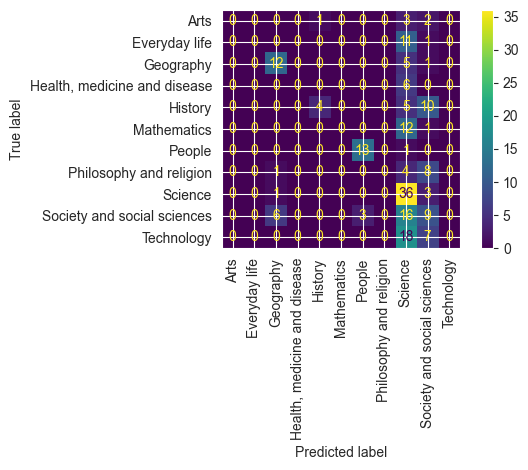

In [861]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cmn, display_labels=svm_nrml.classes_)
disp.plot(xticks_rotation=90)

plt.tight_layout()

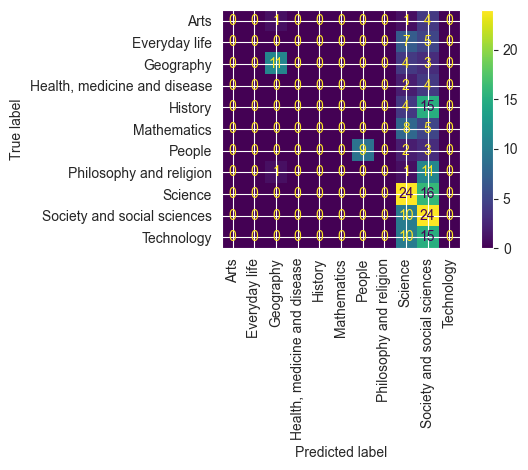

In [862]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cmc, display_labels=svm_nrml.classes_)
disp.plot(xticks_rotation=90)

plt.tight_layout()

## Standardized

In [863]:
svm_std = SVC(kernel="linear")
svm_std.fit(X_train_std, Y_train)

SVC(kernel='linear')

In [864]:
svm_std.score(X_train_std, Y_train)

0.4893350062735257

In [865]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm_std, X_train_std, Y_train, cv=5, scoring="accuracy")
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.47 accuracy with a standard deviation of 0.03


In [866]:
svm_std.score(X_test_std, Y_test)

0.425

### Confusion matrix
[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix)

In [867]:
y_pred_std = svm_std.predict(X_test_std)
y_pred_cross = cross_val_predict(svm_std, X_test_std, Y_test, cv=5)
cmn = confusion_matrix(Y_test, y_pred_std)
cmc = confusion_matrix(Y_test, y_pred_cross)


[Display Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay)

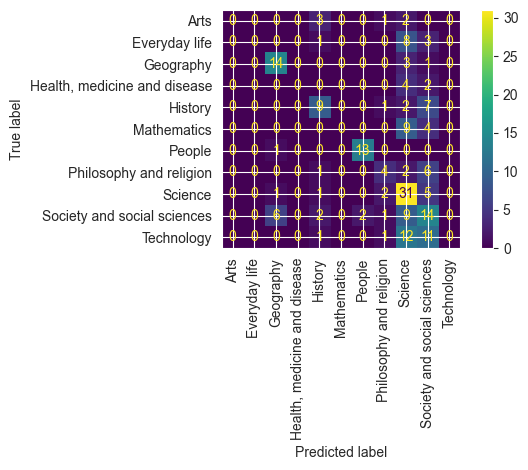

In [868]:
disp = ConfusionMatrixDisplay(confusion_matrix=cmn, display_labels=svm_std.classes_)
disp.plot(xticks_rotation=90)

plt.tight_layout()

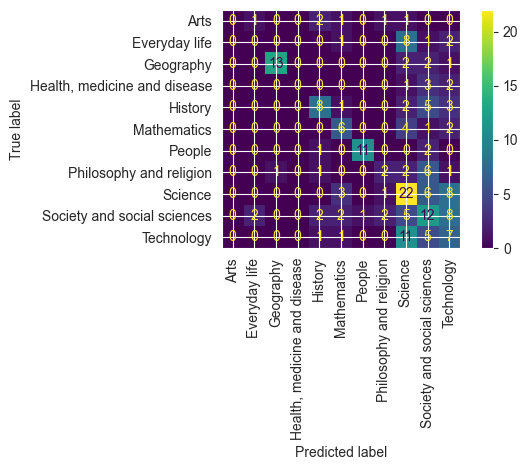

In [869]:
disp = ConfusionMatrixDisplay(confusion_matrix=cmc, display_labels=svm_std.classes_)
disp.plot(xticks_rotation=90)

plt.tight_layout()

In [870]:
from sklearn.metrics import precision_score, recall_score

precision_score(Y_test, y_pred_cross, average='micro')

0.405

In [871]:
recall_score(Y_test, y_pred_cross, average='micro')

0.405

In [872]:
from sklearn.metrics import f1_score

f1_score(Y_test, y_pred_cross, average='micro')

0.405

Precision/Recall Trade-off

In [873]:
y_scores = svm_std.decision_function(X)

In [874]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [875]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)

In [876]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm, datasets


classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=0))
y_scoresb = classifier.fit(X_trainb, Y_trainb).decision_function(X_testb)



Roc curves


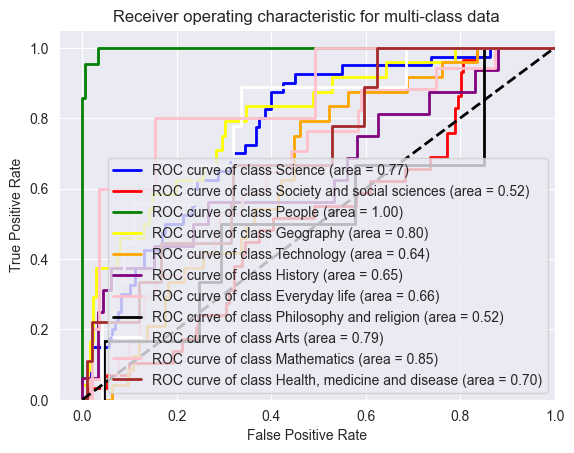

In [878]:
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

lw = 2
fpr = dict()
tpr = dict()
roc_auc = dict()
precision = dict()
recall = dict()
threshold = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_testb[:, i], y_scoresb[:, i])
    precision[i], recall[i], threshold[i] = precision_recall_curve(Y_testb[:, i], y_scoresb[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = cycle(['blue', 'red', 'green', 'yellow', 'orange', 'purple', 'pink', 'black', 'white','pink', 'brown'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(classes[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

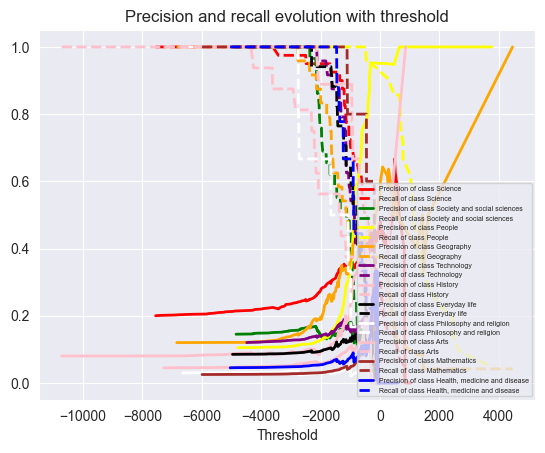

In [962]:
for i, color in zip(range(n_classes), colors):
    plt.plot(threshold[i], precision[i][:-1], color=color, lw=lw,
             label='Precision of class {0}'
             ''.format(classes[i]))
    plt.plot(threshold[i], recall[i][:-1], color=color, linestyle='dashed', lw=lw,
             label='Recall of class {0}'
               ''.format(classes[i]))

plt.xlabel('Threshold')
plt.title('Precision and recall evolution with threshold')
plt.legend(loc="lower right", prop={'size': 5})
plt.show()

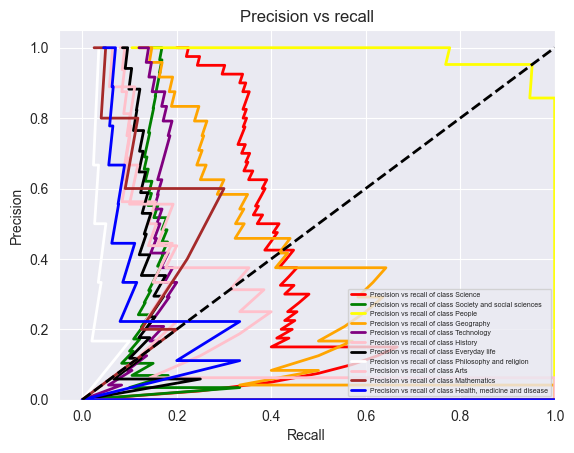

In [964]:
for i, color in zip(range(n_classes), colors):
    plt.plot(precision[i], recall[i], color=color, lw=lw,
             label='Precision vs recall of class {0}'
             ''.format(classes[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs recall')
plt.legend(loc="lower right", prop={'size': 5})
plt.show()

In [950]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)

y_scores_forest = cross_val_predict(forest_clf, X_testb, Y_testb, cv=5,
                                    method="predict_proba")

In [953]:

fpr_forest = dict()
tpr_forest = dict()
thresholds_forest = dict()

for i in range(n_classes):
    fpr_forest[i], tpr_forest[i], thresholds_forest[i] = roc_curve(Y_testb[:, i], y_scores_forest[i][:, 1])



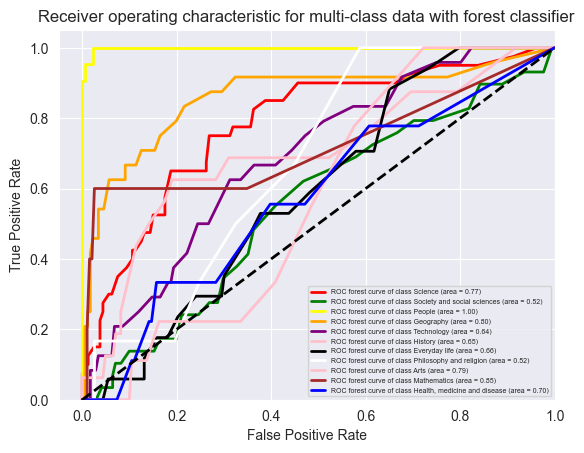

In [963]:
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_forest[i], tpr_forest[i], color=color, lw=lw,
             label='ROC forest curve of class {0} (area = {1:0.2f})'
             ''.format(classes[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data with forest classifier')
plt.legend(loc="lower right", prop={'size': 5})
plt.show()